In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

The data used here is gotten manually from the cnn_decoder.ipynb notebook by running it with different settings. These are the settings that are kept the same:

BATCH_SIZE = 32
TRAINING_BATCHES = 200_000

CODE_DISTANCE = 3

INIT_LEARNING_RATE = 0
LEARNING_RATE = 1E-3
WARMUP_STEPS = 2_000
TRANSITION_STEP = 50_000
DECAY_RATE = 0.95

NUM_FILTERS = 8
CONV_LAYERS = [(NUM_FILTERS,2,1,0), (NUM_FILTERS,2,1,0)]
FC_LAYERS = [50, 2]
print(f"{NUM_FILTERS = }")

SEED = 16

DEFORMATION = jnp.zeros((CODE_DISTANCE, CODE_DISTANCE), dtype=jnp.int32).at[1::2, ::2].set(3).flatten().at[::2].set(2)

p, nu = .01, 500
ERROR_PROBS = jnp.array([
    1 / (2 * (nu + 1)) * p,
    1 / (2 * (nu + 1)) * p,
    nu / (nu + 1) * p,
])
ERROR_PROB_TRAINING_SCALE = # This setting was changed from between .5 and 10

[[2.5975824e-06 2.2721179e-06 1.5856640e-06 1.5506612e-06 1.5506612e-06
  1.5506612e-06 1.5151090e-06 1.9047948e-06 1.5151090e-06 2.2452332e-06
  2.2452332e-06]
 [4.0365776e-06 3.7112659e-06 3.0253250e-06 2.9903567e-06 2.9903567e-06
  2.9903567e-06 2.9548464e-06 3.3441793e-06 2.9548464e-06 3.6843994e-06
  3.6843994e-06]]


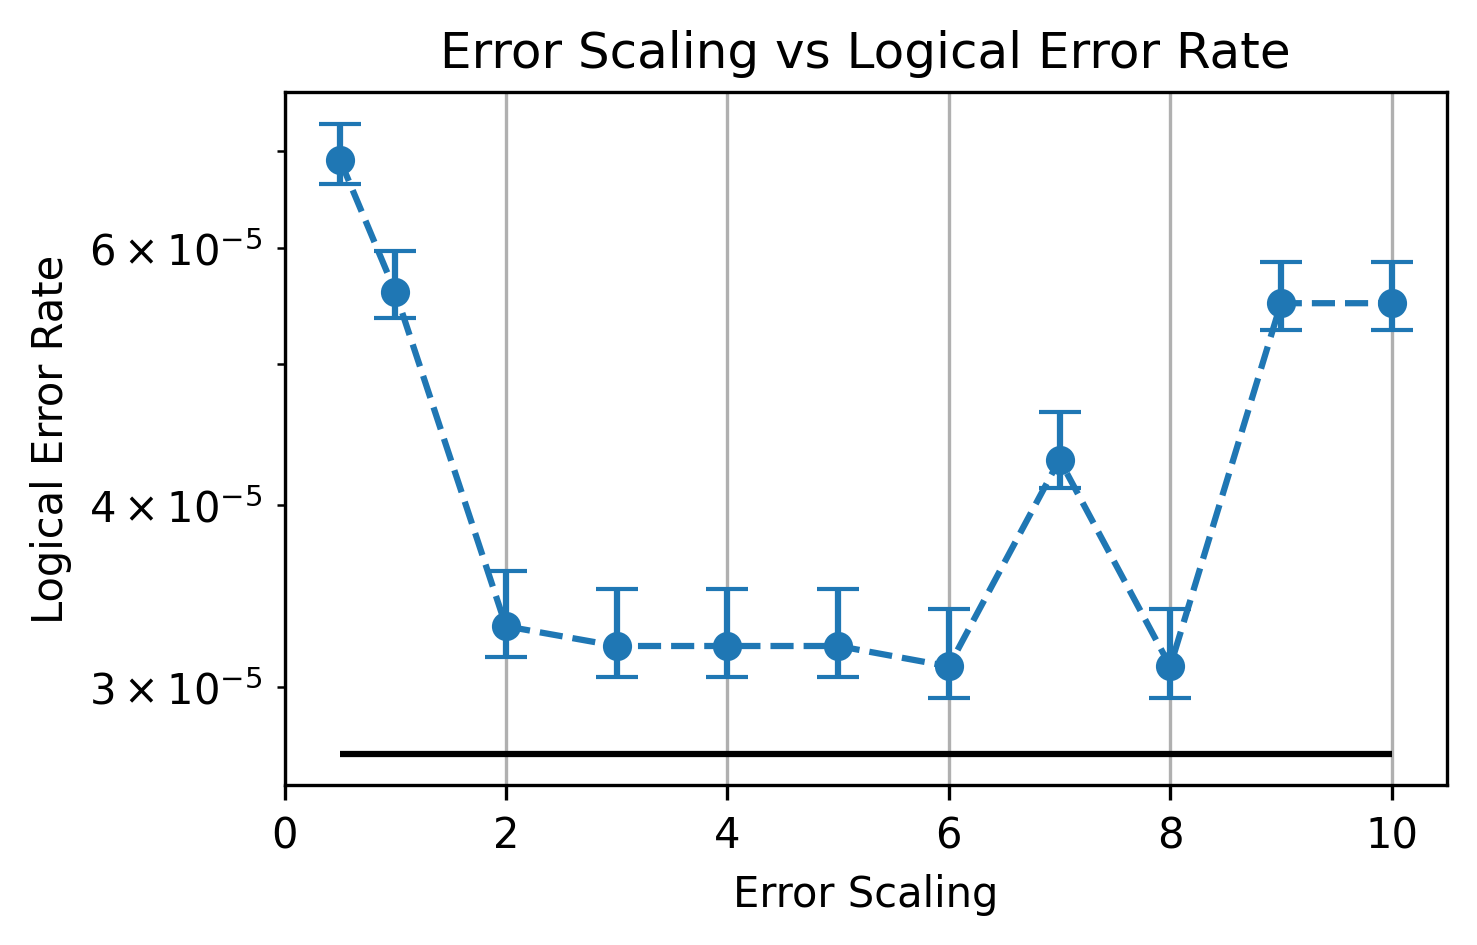

In [37]:
from scipy.stats import beta

# Pairs of numbers [error-scaling, logical-error-rate]
data = jnp.array([
    [.5, 6.902218e-05],
    [1, 5.6028366e-05],
    [2, 3.3020973e-05],
    [3, 3.2007694e-05],
    [4, 3.2007694e-05],
    [5, 3.2007694e-05],
    [6, 3.0994415e-05],
    [7, 4.297495e-05],
    [8, 3.0994415e-05],
    [9, 5.5015087e-05],
    [10, 5.5015087e-05],
])

confidence = 30.9 # 1 sigma of comfidence

plt.figure(figsize=(5,3), dpi=300)
# Calculate error bars using the beta distribution
alpha = data[:, 1] * 1E6 + 1
beta_param = (1 - data[:, 1]) * 1E6 + 1
lower_bounds = beta.ppf((1 - confidence / 100) / 2, alpha, beta_param)
upper_bounds = beta.ppf(1 - (1 - confidence / 100) / 2, alpha, beta_param)
error_bars = jnp.array([data[:, 1] - lower_bounds, upper_bounds - data[:, 1]])
plt.hlines([2.7000904e-05], [.5], [10], color='k')
plt.errorbar(data[:, 0], data[:, 1], yerr=error_bars, fmt='--o', capsize=5)
plt.xlabel('Error Scaling')
plt.ylabel('Logical Error Rate')
plt.yscale('log')
plt.title('Error Scaling vs Logical Error Rate')
plt.xlim(0, 10.5)
plt.grid(True)
print(error_bars)

plt.savefig('figs/error_scaling_vs_logical_error_rate.png', bbox_inches='tight')
plt.savefig('figs/error_scaling_vs_logical_error_rate.eps', bbox_inches='tight')

plt.show()